### Time Series Forecasting with LSTM
Although ARIMA has the advantage of faster computation, and being able to provide prediction intervals as a statistical model.\
But XGBoost and LSTM usually provide better forecasting accuracy. Here, we will utilize LSTM to predict TSMC stock price.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

2024-02-19 13:40:34.761432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_path = '/Users/jennyhsu/Desktop/HW3_Problem3/TSMC.csv'
df = pd.read_csv(file_path)
data = df['Price'].values

In [3]:
train_end = 1014
test_start = 1015
test_end = 1028

In [4]:
train = data[:train_end]
test = data[test_start-1:test_end]

In [5]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

In [6]:
look_back = 1  
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
tf.random.set_seed(66)
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1013/1013 - 3s - loss: 4865.4111 - 3s/epoch - 3ms/step
Epoch 2/20
1013/1013 - 1s - loss: 1624.6469 - 1s/epoch - 1ms/step
Epoch 3/20
1013/1013 - 1s - loss: 599.7922 - 1s/epoch - 1ms/step
Epoch 4/20
1013/1013 - 1s - loss: 240.2722 - 1s/epoch - 1ms/step
Epoch 5/20
1013/1013 - 1s - loss: 117.2723 - 1s/epoch - 1ms/step
Epoch 6/20
1013/1013 - 1s - loss: 75.2219 - 1s/epoch - 1ms/step
Epoch 7/20
1013/1013 - 1s - loss: 48.6219 - 1s/epoch - 1ms/step
Epoch 8/20
1013/1013 - 1s - loss: 33.4053 - 1s/epoch - 1ms/step
Epoch 9/20
1013/1013 - 1s - loss: 22.8352 - 1s/epoch - 1ms/step
Epoch 10/20
1013/1013 - 1s - loss: 17.6977 - 1s/epoch - 1ms/step
Epoch 11/20
1013/1013 - 1s - loss: 13.6498 - 1s/epoch - 1ms/step
Epoch 12/20
1013/1013 - 1s - loss: 12.2950 - 1s/epoch - 1ms/step
Epoch 13/20
1013/1013 - 1s - loss: 10.8088 - 1s/epoch - 1ms/step
Epoch 14/20
1013/1013 - 1s - loss: 11.2862 - 1s/epoch - 1ms/step
Epoch 15/20
1013/1013 - 1s - loss: 10.3025 - 1s/epoch - 1ms/step
Epoch 16/20
1013/1013 - 1s 

In [11]:
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 464ms/step


In [12]:
testScore = np.sqrt(mean_squared_error(Y_test, test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 5.96 RMSE


In [13]:
test_predict

array([[115.19781 ],
       [112.950035],
       [113.271255],
       [114.9801  ],
       [117.04833 ],
       [117.4327  ],
       [120.815636],
       [125.214096],
       [124.935104],
       [123.688576],
       [122.21433 ],
       [123.09937 ],
       [122.97828 ]], dtype=float32)

In [14]:
test_result = test_predict.flatten().tolist()
test_result

[115.19780731201172,
 112.95003509521484,
 113.27125549316406,
 114.9801025390625,
 117.04833221435547,
 117.43270111083984,
 120.81563568115234,
 125.21409606933594,
 124.93510437011719,
 123.6885757446289,
 122.2143325805664,
 123.09937286376953,
 122.97827911376953]

33/33 [==============================] - 0s 1ms/step


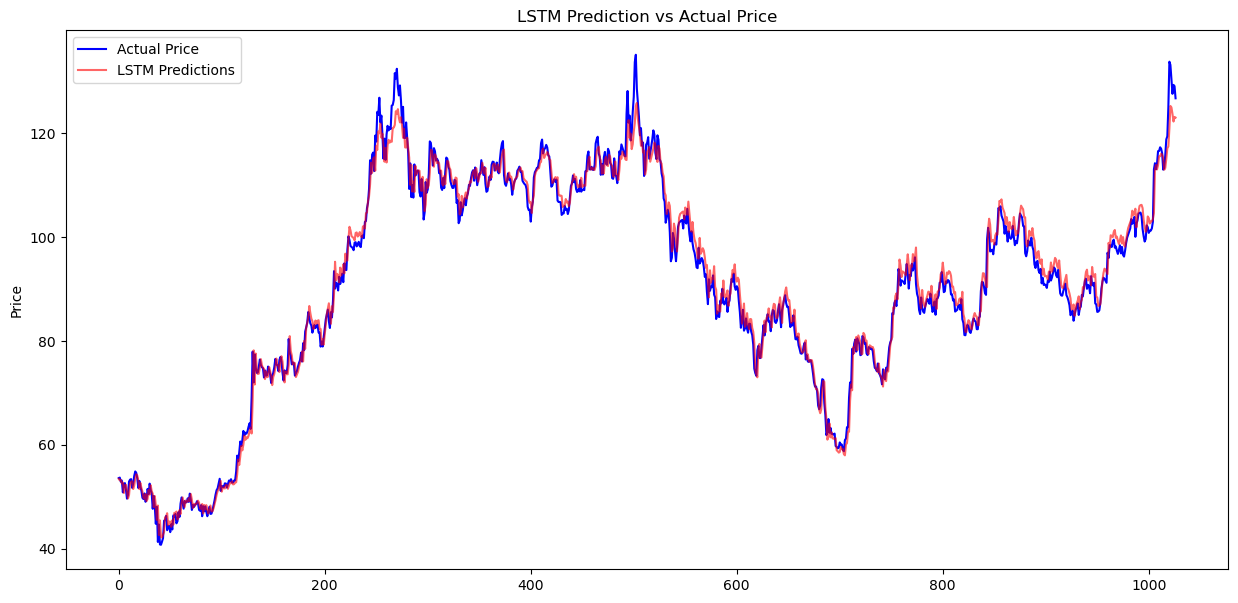

In [15]:
import matplotlib.pyplot as plt

# Create dataset for the entire data to get predictions
X_all, _ = create_dataset(data, look_back)
X_all = np.reshape(X_all, (X_all.shape[0], 1, look_back))

# Generate predictions for the entire dataset
all_predictions = model.predict(X_all)

# Prepare the data for plotting
data_plot = data[look_back:] 

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(data_plot, label='Actual Price', color='blue')
plt.plot(all_predictions, label='LSTM Predictions', color='red', alpha=0.6)
plt.title('LSTM Prediction vs Actual Price')
plt.ylabel('Price')
plt.legend()
plt.show()